##INITIAL SETUP

In [1]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d START-UMD/gtd -p '/content/TERRORISM EDA'

gtd.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile

zipfile_path='/content/TERRORISM EDA/gtd.zip'
extract_path='/content/Extracted Terrorism Dataset'

with zipfile.ZipFile(zipfile_path,'r') as zip_ref:
  zip_ref.extractall(extract_path)

##INSTALLING LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
!pip install basemap
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display


import codecs
from subprocess import check_output

In [8]:
df = pd.read_csv('/content/Extracted Terrorism Dataset/globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')


In [9]:
df.shape

(181691, 135)

In [10]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
df.columns.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

##DATA PREPROCESSING

In [12]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

In [13]:
df = df[['eventid','Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [14]:
df['Killed'].sample(10)

50282     0.0
143634    2.0
31181     0.0
33771     2.0
22446     0.0
155060    1.0
139648    0.0
151948    3.0
111447    0.0
134738    0.0
Name: Killed, dtype: float64

In [15]:
df['casualities']=df['Killed']+df['Wounded']
df.head(3)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,...,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success,casualities
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,...,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1,1.0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1,1.0


In [16]:
df.isna().sum()

eventid             0
Year                0
Month               0
Day                 0
Country             0
Region              0
state             421
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
success             0
casualities     16874
dtype: int64

##EDA

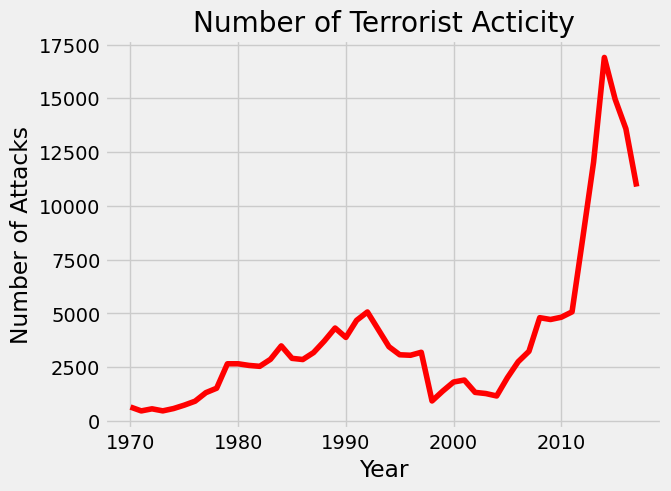

In [17]:
year_attacks = df.groupby('Year').size().reset_index(name='count')
sns.lineplot(x='Year', y='count', data=year_attacks, color='red')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title("Number of Terrorist Acticity")
plt.show()

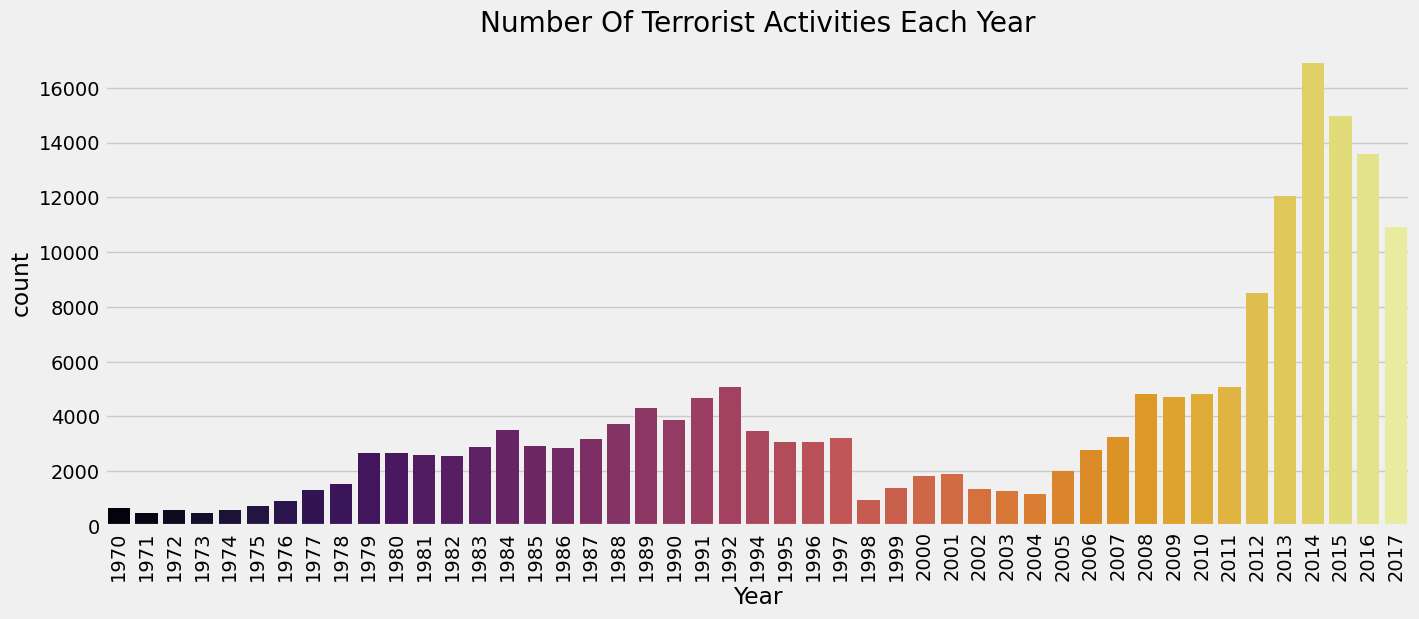

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot(data=df, x='Year', palette='inferno')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

###TERRORIST ATTACKS TREND

In [19]:
year_attacks_region = df.groupby(['Year','Region']).size().reset_index(name='count')

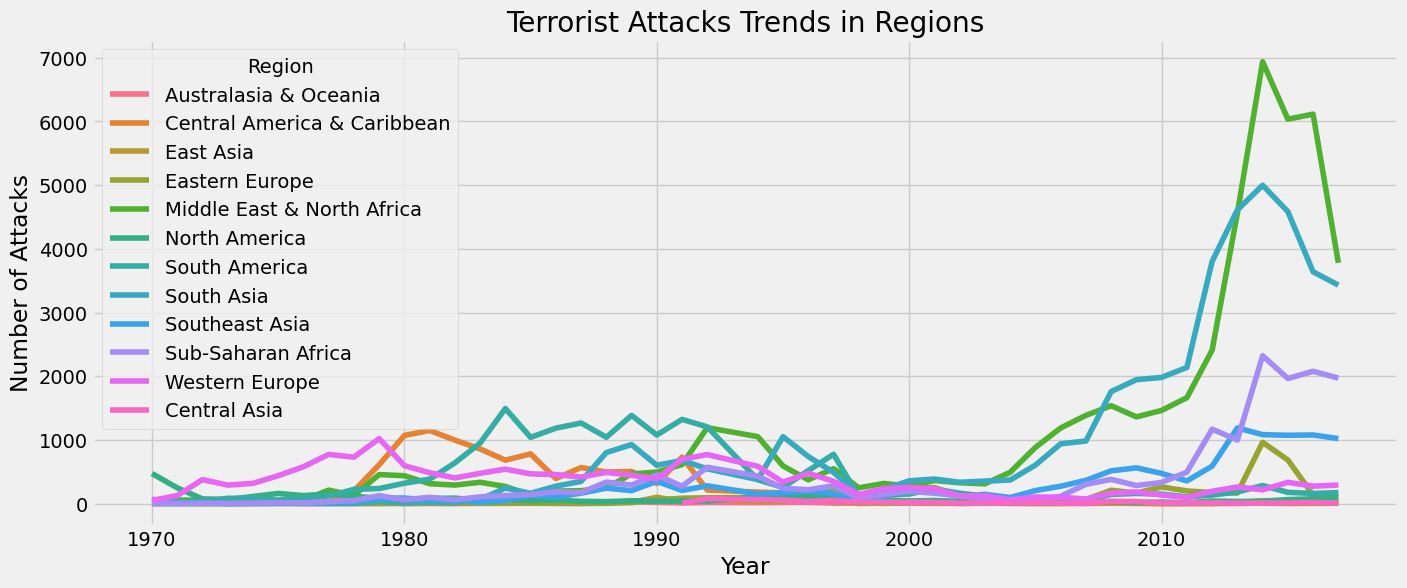

In [20]:
plt.subplots(figsize=(15,6))
sns.lineplot(x='Year',y='count',hue='Region',data=year_attacks_region)
plt.title('Terrorist Attacks Trends in Regions')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

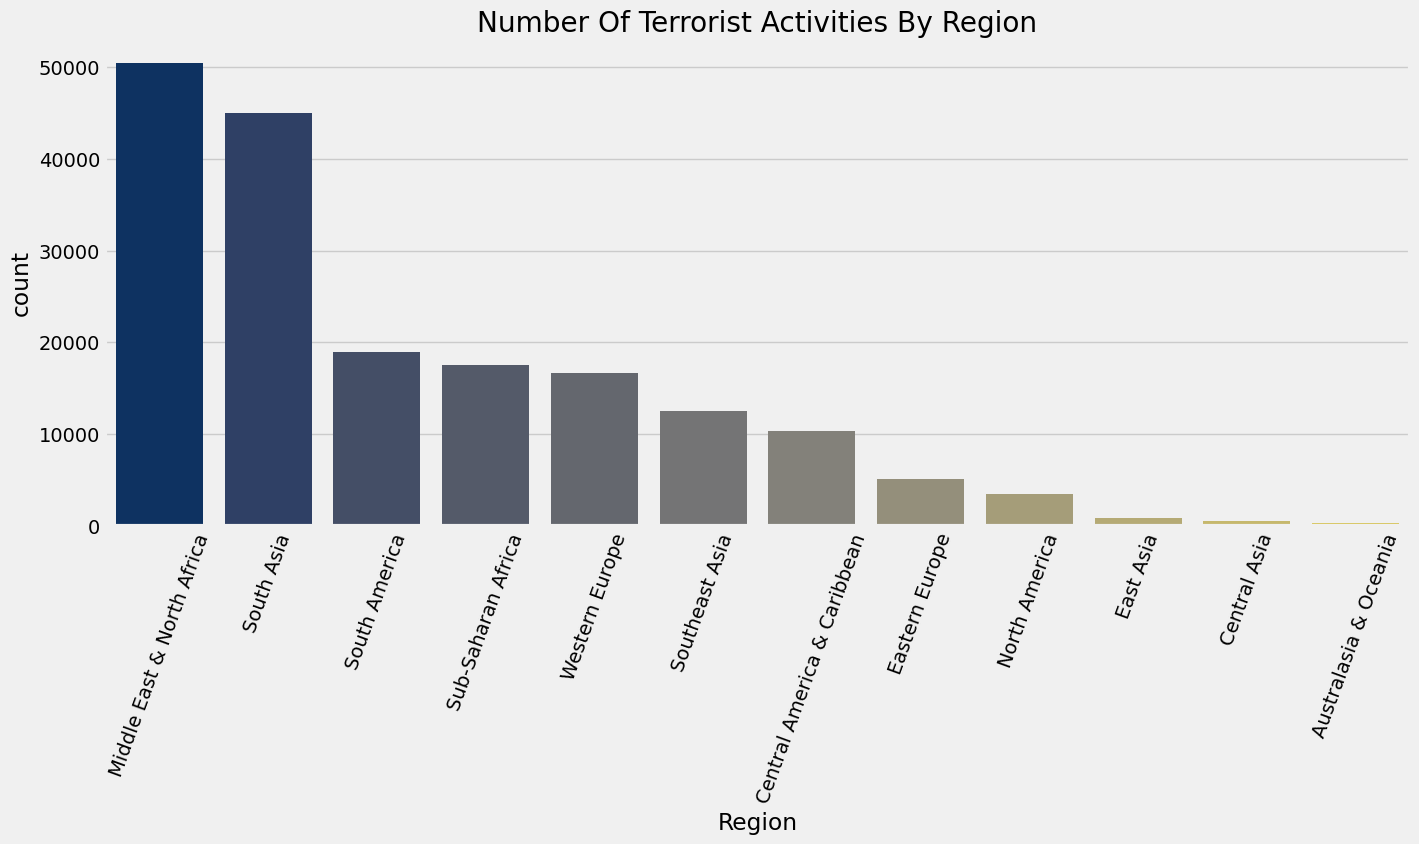

In [23]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Region',data=df,palette='cividis',order=df['Region'].value_counts().index)
plt.xticks(rotation=70)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

###MOST AFFECTED COUNTRIES

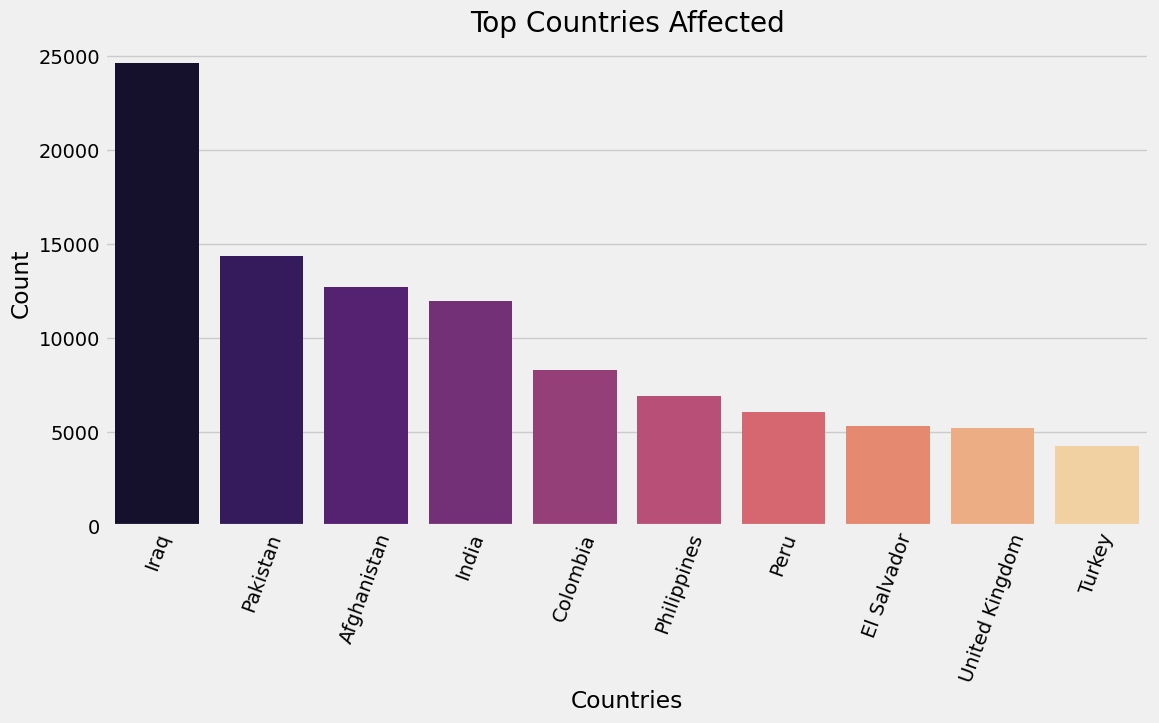

In [24]:
plt.subplots(figsize=(12,6))
top=df['Country'].value_counts()[:10].to_frame().reset_index()
top.columns= ['Country','Attacks_Counts']
sns.barplot(x='Country',y='Attacks_Counts', data= top, palette='magma')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

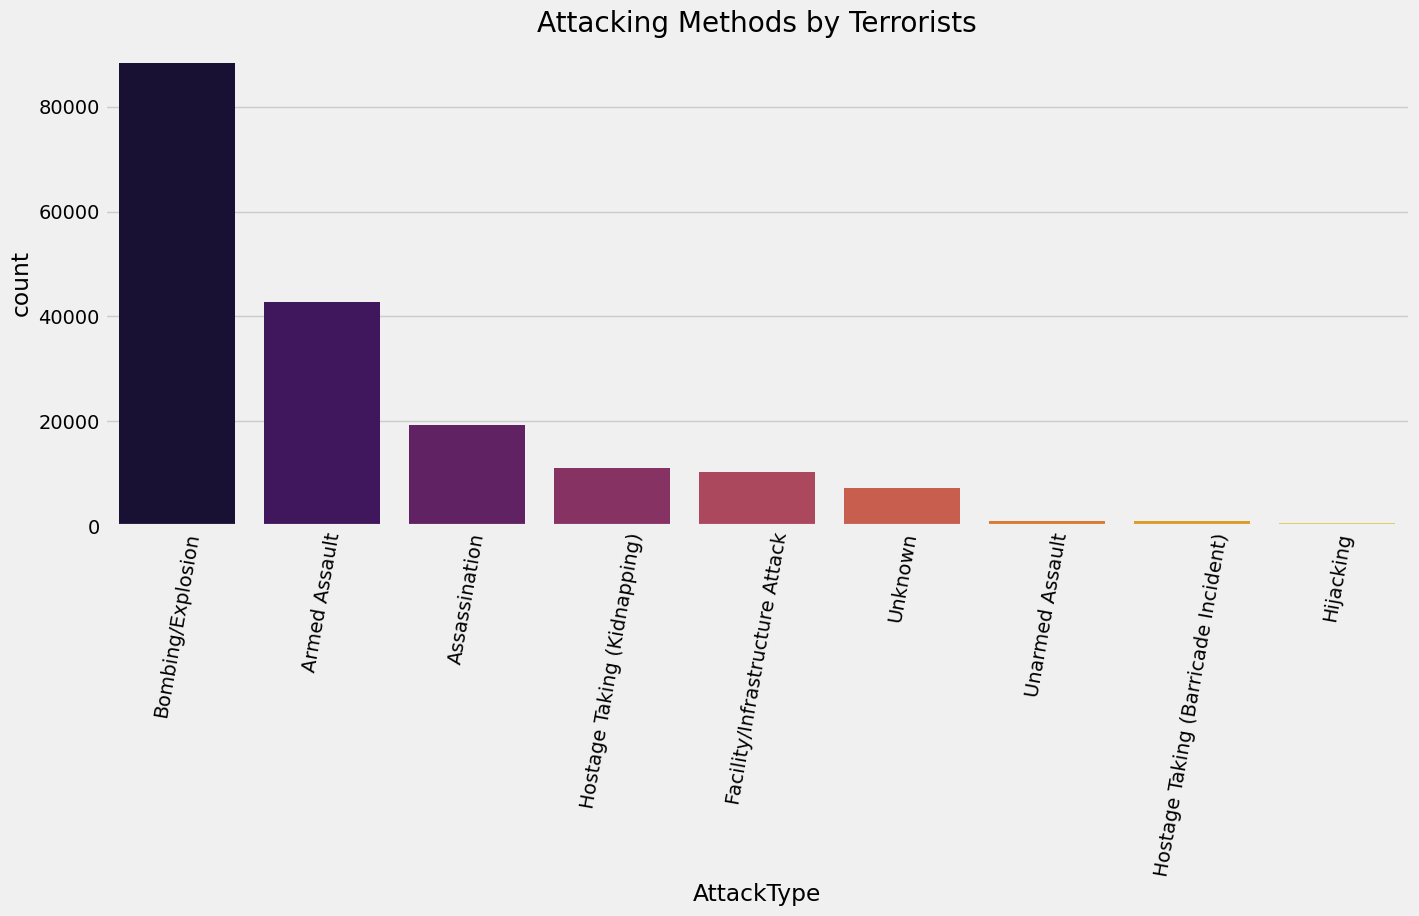

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot(x='AttackType',data=df,palette='inferno',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=80)
plt.title('Attacking Methods by Terrorists')
plt.show()

###TOP TERRORIST GROUPS

In [26]:
group_counts = df['Group'].value_counts()
sort = group_counts.sort_values(ascending=False)

# Select the top 5 most frequent groups
sort = sort.iloc[1:]
top_5 = sort.head(10)

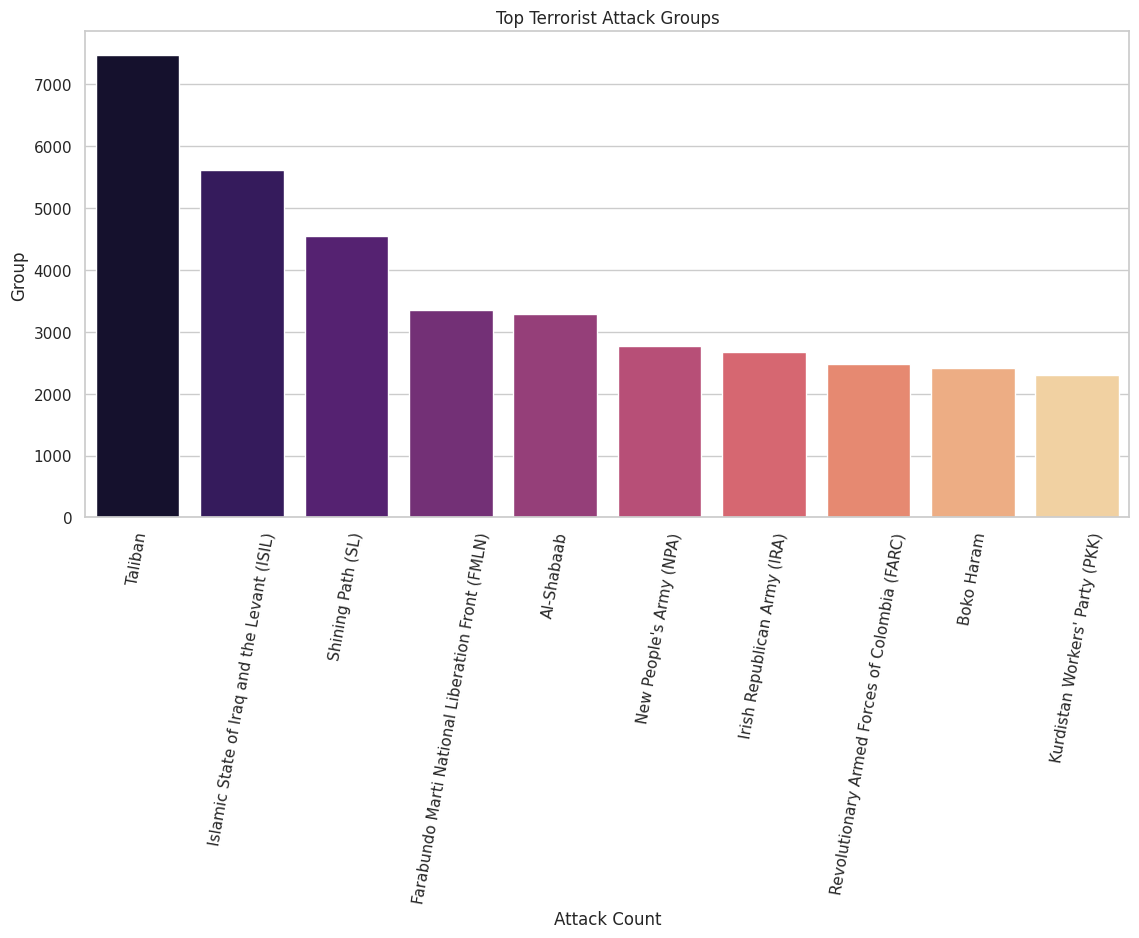

In [27]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5.index, y=top_5.values, palette="magma")
plt.title('Top Terrorist Attack Groups')
plt.xlabel('Attack Count')
plt.ylabel('Group')
plt.xticks(rotation = 80)
plt.show()

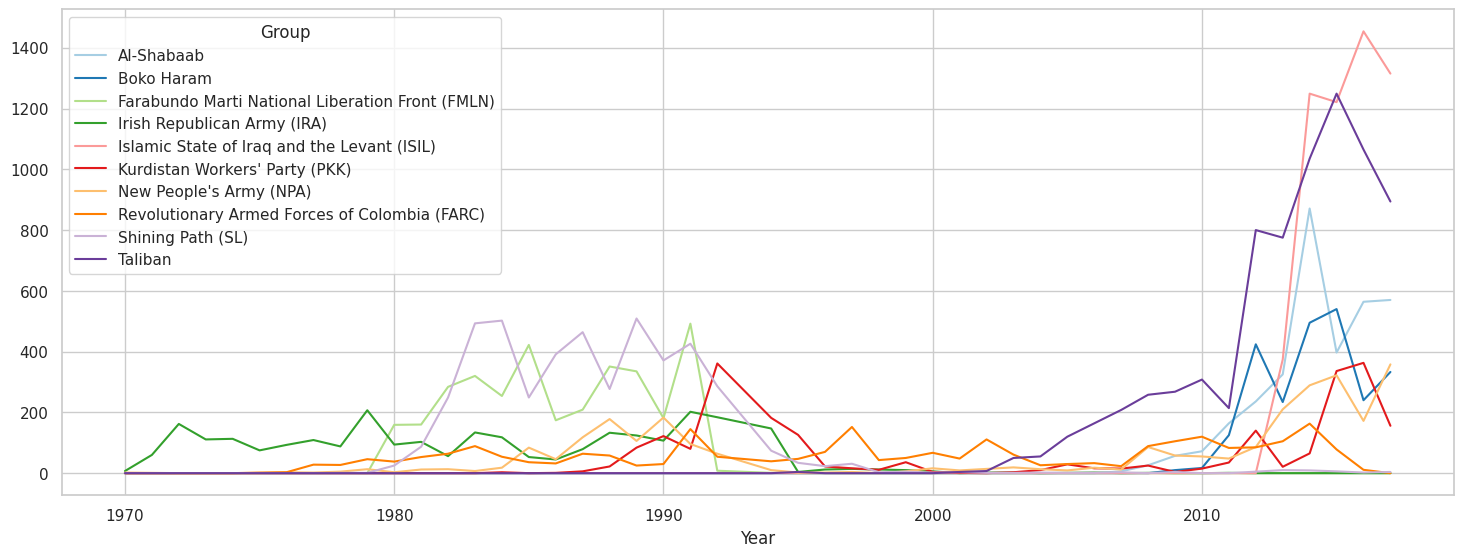

In [28]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

###CASUALITIES

In [29]:
k=df[["Year","Killed"]].groupby("Year").sum()

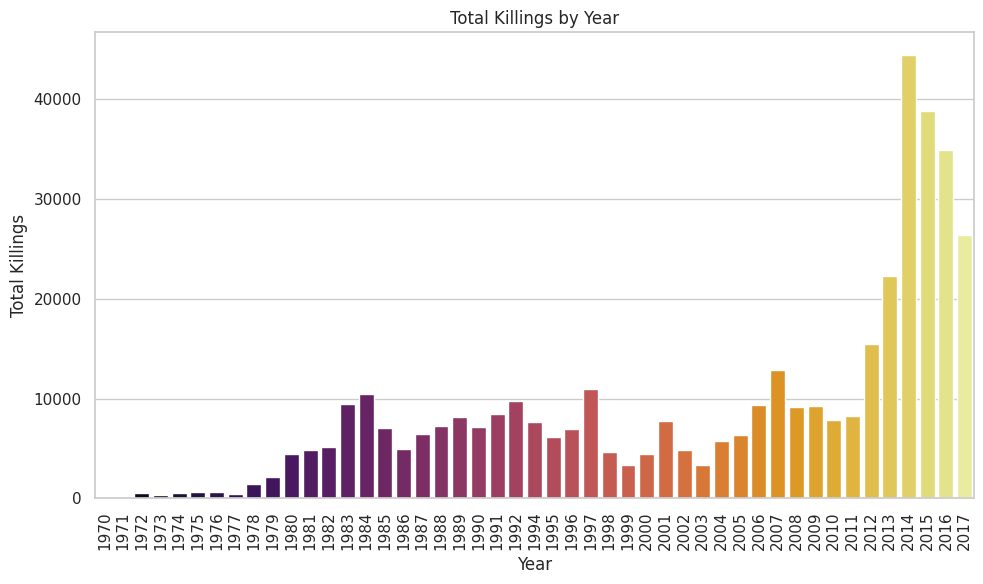

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=k.index, y="Killed", palette="inferno",data=k)

plt.title("Total Killings by Year")
plt.xlabel("Year")
plt.ylabel("Total Killings")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [32]:
killData = df.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


In [33]:
attackData = df.loc[:,'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)

In [34]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


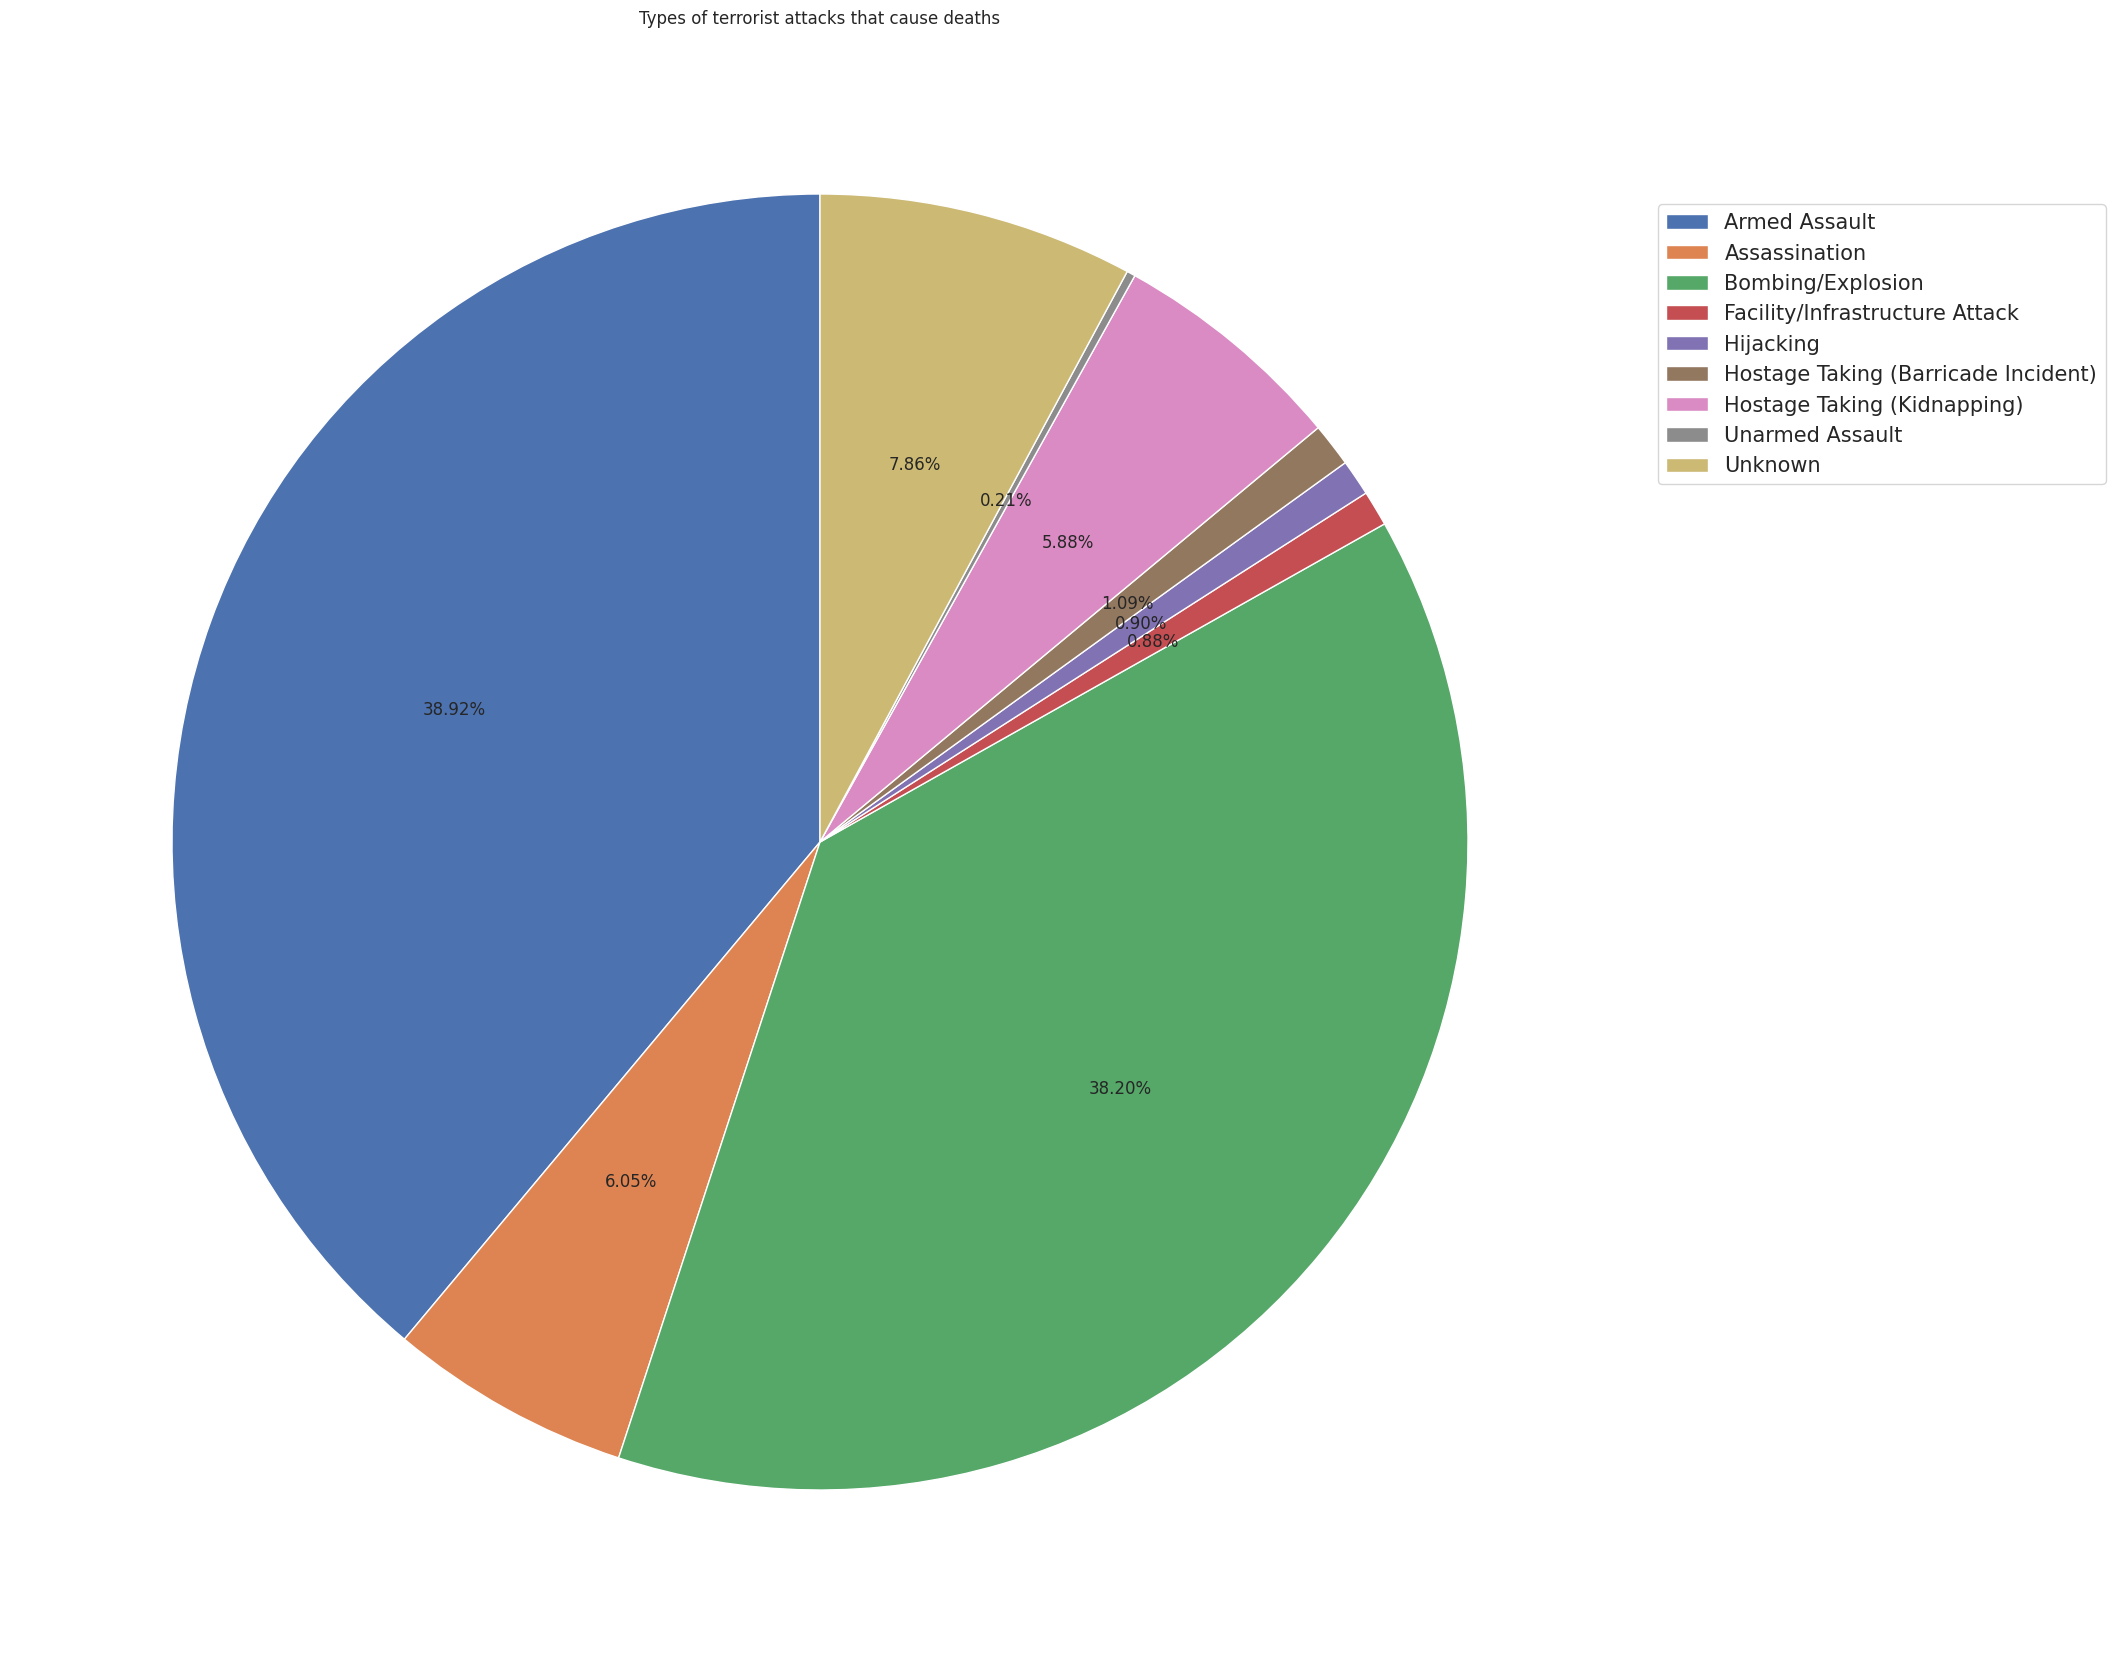

In [35]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze

# Assuming values is a 2D array
values = transpoze.values.tolist()
values = np.array(values).flatten()  # Flatten the 2D array to make it 1D

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)  # location legend
plt.show()

###TERRORIST ATTACKS IN INDIA

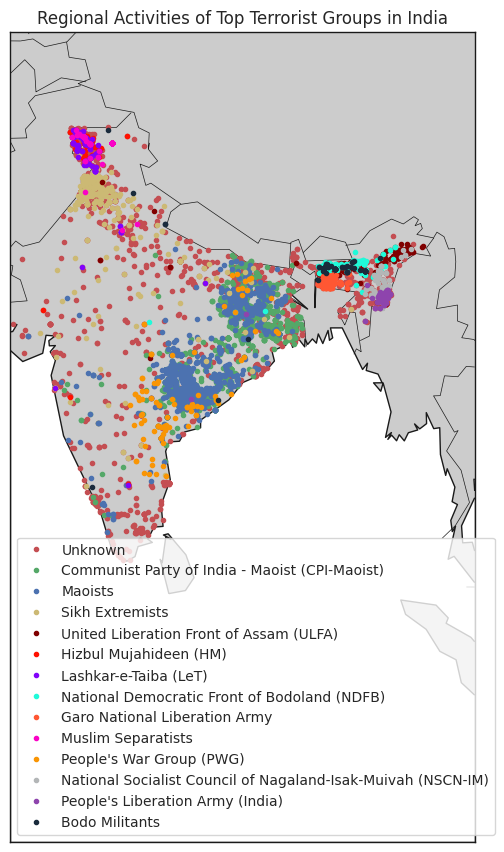

In [36]:
india_data = df[df['Country'] == 'India']

# Get the top 14 terrorist groups in India
top_groups = india_data['Group'].value_counts().head(14).index

# Create a Basemap instance
m4 = Basemap(
    projection='mill',
    llcrnrlat=-10,
    urcrnrlat=40,
    llcrnrlon=70,
    urcrnrlon=100,
    resolution='c',
    lat_0=True,
    lat_1=True
)

# Customize the map
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='#fff')
m4.drawmapboundary(fill_color='#fff')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(22, 10)

# Define colors for plotting
colors = ['r', 'g', 'b', 'y', '#800000', '#ff1100', '#8202fa', '#20fad9', '#ff5733', '#fa02c6', "#f99504", '#b3b6b7', '#8e44ad', '#1a2b3c']

# Iterate through the top groups and plot their activities
for group, color in zip(top_groups, colors):
    group_data = india_data[india_data['Group'] == group]
    x_group, y_group = m4(group_data['longitude'].values, group_data['latitude'].values)
    m4.plot(x_group, y_group, 'go', markersize=3, color=color, label=group)

# Add legend
plt.legend(loc='lower left', frameon=True, prop={'size': 10})

# Set the plot title
plt.title('Regional Activities of Top Terrorist Groups in India')

# Show the plot
plt.show()

In [37]:
India = df[(df['Country'] == 'India')]
India.head(5)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,...,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success,casualities
1186,197202220004,1972,2,22,India,South Asia,Delhi,New Delhi,28.585836,77.153336,...,0.0,0.0,B-747,NaN,Palestinians,Airports & Aircraft,Explosives,NaN,1,0.0
2764,197501190004,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,...,4.0,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,Unknown,1,4.0
3857,197605260001,1976,5,26,India,South Asia,Delhi,New Delhi,28.585836,77.153336,...,0.0,0.0,New Delhi airport,NaN,Unknown,Airports & Aircraft,Explosives,NaN,1,0.0
5327,197709280004,1977,9,28,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,...,0.0,0.0,DC-8,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,1,0.0
7337,197901130004,1979,1,13,India,South Asia,Assam,Unknown,26.200605,92.937574,...,NaN,NaN,patrol,NaN,Naga People,Police,Firearms,NaN,1,NaN


In [38]:
India_attacks = India['eventid'].count()
print('There were',India_attacks ,'attacks in India.')

There were 11960 attacks in India.
